In [1]:
# Import required libraries
from src.ml import RegressorFramework
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
# Load fermentation parameters and amino acid data
amino_acid_path = "./data/AAs.csv"
fp_path = "./data/FPs.csv"
amino_acid = pd.read_csv(amino_acid_path, index_col=0)
fp = pd.read_csv(fp_path, index_col=0)

In [3]:
# Set up fp feature selection models
models = {
    "Bagging": BaggingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
}

In [4]:
# Combination of 4 fermentation parameters
fp_list = []
for i in range(len(fp.columns)):
    fp_list.extend(itertools.combinations(fp.columns, i + 1))
fp_list

[('Starch',),
 ('RS',),
 ('TA',),
 ('Moisture',),
 ('Starch', 'RS'),
 ('Starch', 'TA'),
 ('Starch', 'Moisture'),
 ('RS', 'TA'),
 ('RS', 'Moisture'),
 ('TA', 'Moisture'),
 ('Starch', 'RS', 'TA'),
 ('Starch', 'RS', 'Moisture'),
 ('Starch', 'TA', 'Moisture'),
 ('RS', 'TA', 'Moisture'),
 ('Starch', 'RS', 'TA', 'Moisture')]

In [5]:
# Evaluate model performance using fermentation parameter combination
results = []
for target_fp in fp_list:
    for name, model in models.items():
        for aa in amino_acid.columns:
            X = fp.loc[:, fp.columns.isin(target_fp)]
            y = amino_acid[aa]
            X_shuffled, y_shuffled = shuffle(X, y, random_state=42)
            reg = RegressorFramework(model)
            r2_score, rmse_score = reg.cross_validate(X_shuffled, y_shuffled)
            results.append({
                'fp_combination': "+".join(target_fp),
                'model': name,
                'amino_acid': aa,
                'r2': r2_score,
                'rmse': rmse_score
            })

results_df = pd.DataFrame(results)
results_df.head()

,fp_combination,model,amino_acid,r2,rmse
0,Starch,Bagging,Asp,0.191780,0.204823
1,Starch,Bagging,Pro,0.071838,1.828083
2,Starch,Bagging,Met,-0.115792,0.206258
3,Starch,Bagging,Phe,-0.048268,0.984657
4,Starch,Bagging,Val,0.032083,1.150542


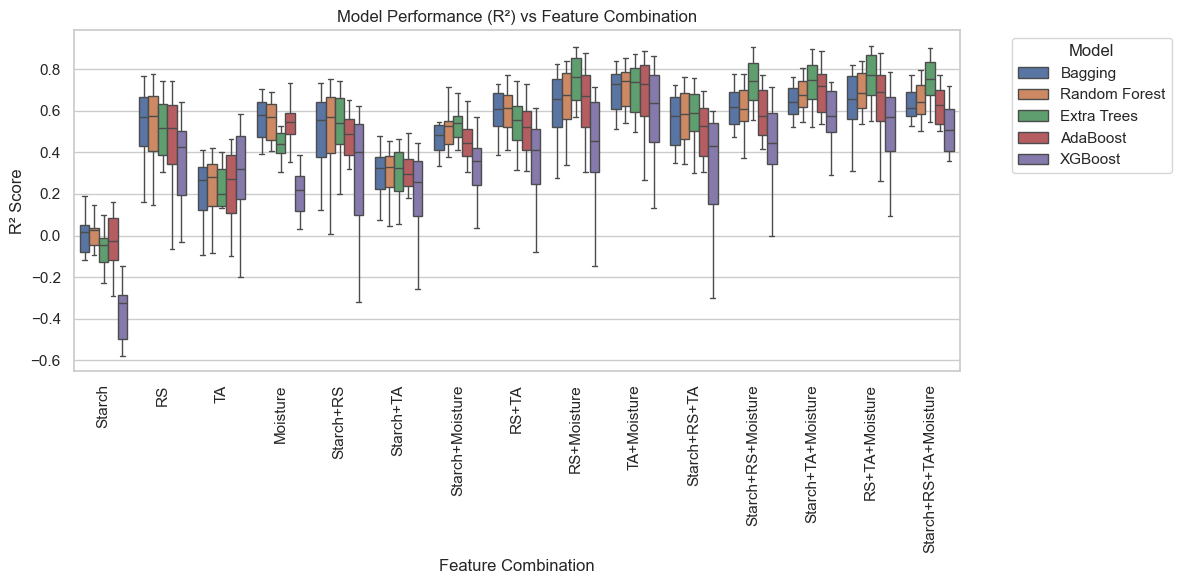

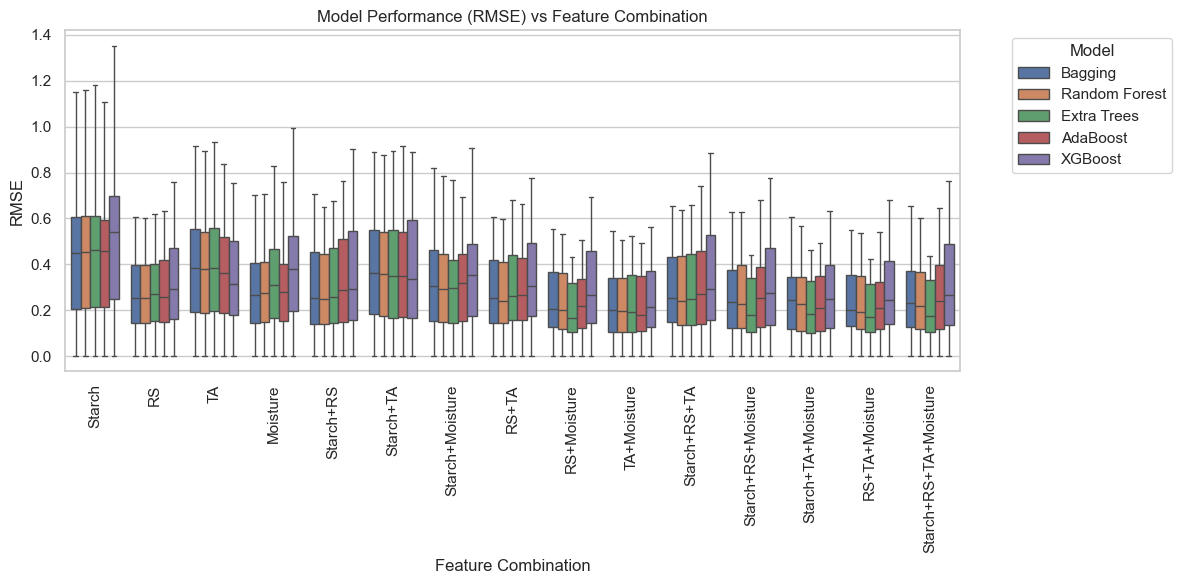

In [6]:
sns.set(style="whitegrid")

# R² boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='fp_combination', y='r2', hue='model', showfliers=False)
plt.xlabel("Feature Combination")
plt.ylabel("R² Score")
plt.title("Model Performance (R²) vs Feature Combination")
plt.xticks(rotation=90)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# RMSE boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='fp_combination', y='rmse', hue='model', showfliers=False)
plt.xlabel("Feature Combination")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE) vs Feature Combination")
plt.xticks(rotation=90)  # 设置x轴刻度标签垂直显示
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()